# AVIATION SAFETY ANALYSIS


## OVERVIEW
In this project, we analyze historical aviation accident data from the National Transportation Safety Board (NTSB) to extract meaningful insights and actionable business recommendations aimed at reducing aircraft risk and improving overall safety.

### PROBLEM STATEMENT
The company Seinfield.Co Limited is contemplating on whether to invest on a completely new industry; Aviation by purchasing and operating aircraft for both commercial and private sectors. However, leadership has limited knowledge of the risks associated with different aircraft types and models.
The goal of this project is to:
- Analyze historical aircraft data.
- Identify the key risk factors (such as accidents, incidents, maintenance issues).
- Determine which aircraft models have the lowest risk.
- Provide clear recommendations for the initial aircraft purchase decisions.

### BUSINESS UNDERSTANDING
The Project aims to:
- Minimize investment risk when expanding into aviation.
- Select aircraft that are reliable, safe, and cost-effective.
- Build trust with clients (commercial airlines and private customers) by operating safe aircrafts.
- Optimize long-term operational costs by reducing the likelihood of accidents, failures, or unexpected maintenance.

## DATA UNDERSTANDING
# Data Understanding    
- **Data Source**: NTSB Civil Aviation Accident Database  
- **Period Covered**: 1962–2023  
- The columns include:
- Event Id -Unique identifier for each accident or incident event.
- Investigation Type-Type of investigation: e.g., "Accident" or "Incident.
- Accident Number-Official number assigned to the accident report.
- Event Date-Date when the accident or incident occurred.
- Location- Nearest location of the event. 
- Country-Country where the event took place.
- Latitude-Geographic latitude of the event.
- Longitude-Geographic longitude of the event.
- Airport Code-	Code of the airport closest to the event.
- Airport Name-Full name of the nearby airport.
- Injury Severity-Severity classification of injuries resulting from the event (e.g., "Fatal," "Serious," "Minor," "None").
- Aircraft damage-Extent of aircraft damage (e.g., "Destroyed," "Substantial," "Minor," "None").
- Aircraft Category -Type of aircraft involved.
- Registration Number-Tail number or aircraft registration.
- Make - Manufacturer of the aircraft.
- Model	- Specific aircraft model.
- Amateur Built	- Whether the aircraft was amateur/home-built.
- Number of Engines - Number of engines the aircraft has.
- Engine Type -	Type of engine on a given aircraft.
- FAR Description - Regulatory classification under FAA rules.
- Schedule - Whether the flight was scheduled or unscheduled.
- Purpose of flight	- Primary purpose of the flight (e.g., "Personal," "Business").
- Air carrier - Air carrier name if it was a commercial flight.
- Total Fatal Injuries - Number of people fatally injured in the event.
- Total Serious Injuries - Number of people seriously injured but not killed.
- Total Minor Injuries - Number of people with minor injuries.
- Total Uninjured - Number of people aboard who were not injured.
- Weather Condition - Weather at the time of the event.
- Broad phase of flight - Phase of flight during the event (e.g., "Takeoff," "Landing").
- Report Status	- Status of the accident report (e.g., "Final").
- Publication Date - Date when the report was made publicly available.


In [71]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [72]:
# creating the dataframe 
df = pd.read_csv("AviationData.csv", encoding_errors='replace')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_37316\2107734160.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding_errors='replace')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [73]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [74]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [76]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [77]:
df.shape

(88889, 31)

## DATA CLEANING
Removing duplicates,missing values and outliers

In [78]:
#checking for duplicates
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

- No duplicates found

In [79]:
#checking for missing values
missing_values = df.isnull().sum()
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [80]:
# fill categorical columns with 'Unknown'
categorical_cols = [
    'Location', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity',
    'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
    'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
    'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

#  fill Numerical Injury Columns with 0
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
    'Total.Minor.Injuries', 'Total.Uninjured'
]

for col in injury_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Fill Number.of.Engines with Median
if 'Number.of.Engines' in df.columns:
    median_engines = df['Number.of.Engines'].median()
    df['Number.of.Engines'] = df['Number.of.Engines'].fillna(median_engines)

# Drop columns with too many missing values
columns_to_drop = ['Latitude', 'Longitude', 'FAR.Description', 'Schedule', 'Air.carrier']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])



In [81]:
# Check if missing values still exist
print(df.isnull().sum())


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


In [ ]:
#checking for outliers
# Select numerical features 
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_features]
X.head()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0
4,1.0,1.0,2.0,0.0,0.0


In [83]:
#calculate IQR for each numerical feature
Q1= X.quantile(0.25)
Q3= X.quantile(0.75)
IQR = Q3 - Q1

#define outliers
outliers = (X < (Q1 - 1.5 * IQR))| (X > (Q3 + 1.5 * IQR))
print("Number of outliers detected:", outliers.sum().sum())



Number of outliers detected: 63775


In [84]:
#check for the number of outliers per column
outliers_per_column = outliers.sum()
print("\nOutliers per column:")
print(outliers_per_column)


Outliers per column:
Number.of.Engines         13223
Total.Fatal.Injuries      17813
Total.Serious.Injuries    13090
Total.Minor.Injuries      15502
Total.Uninjured            4147
dtype: int64


In [85]:
#cap the outliers
def cap_outliers(df, lower_percentile=0.01, upper_percentile=0.99):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numerical_columns:
        # Calculate lower and upper percentiles
        lower_threshold = df[column].quantile(lower_percentile)
        upper_threshold = df[column].quantile(upper_percentile)
        
        # Cap the values outside the percentiles
        df[column] = df[column].clip(lower=lower_threshold, upper=upper_threshold)
    
    return df

df= cap_outliers(df)

# Checking the results
df.describe() 



,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1.131501,0.379496,0.204806,0.250762,4.153911
std,0.403051,0.920689,0.551204,0.613799,18.952308
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,3.000000,5.000000,3.000000,3.000000,147.000000


## DATA ANALYSIS

### Correlation Analysis

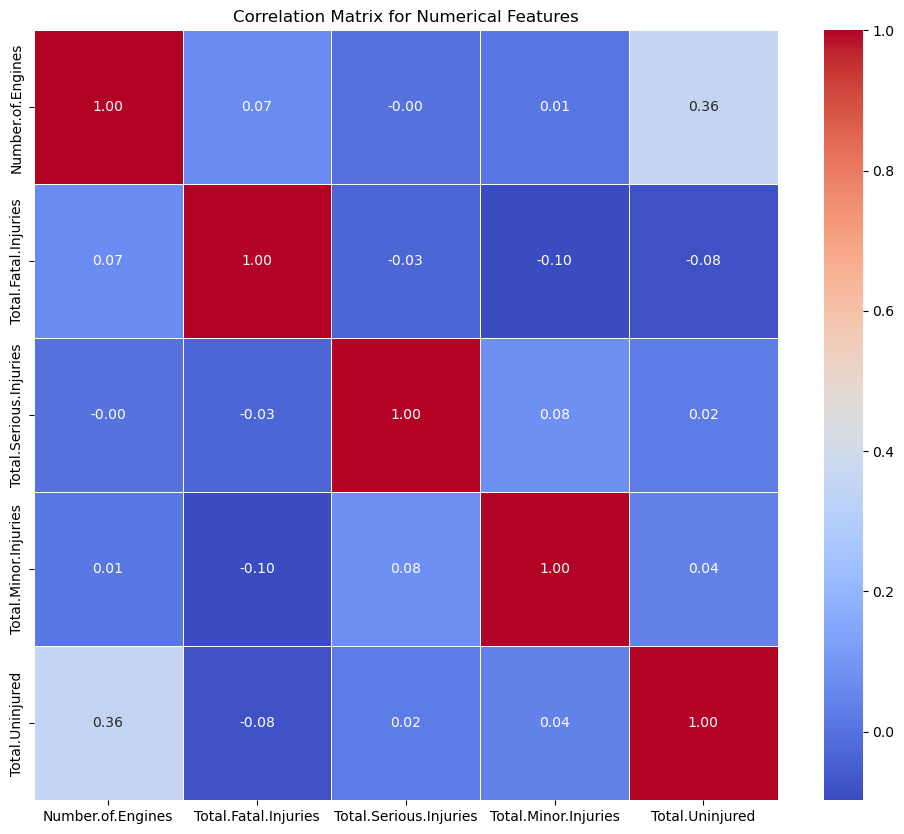

In [86]:

# Calculate the Pearson correlation between numerical variables
corr_matrix = df[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()



Observations:
Number of Engines and Injuries: 
The correlation between the number of engines and the various injury categories i.e, (Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries) is very weak (close to 0). This suggests that the number of engines in an aircraft does not have a significant linear relationship with the number of injuries in accidents.

Injuries Correlation:
The correlation between different categories of injuries is also generally weak. This implies that an accident with a high number of serious injuries does not necessarily mean there will be a proportionally high number of fatal or minor injuries.

Total Uninjured: 
The number of uninjured individuals shows a very weak negative correlation with the number of fatal injuries (-0.08), serious injuries (0.02), and minor injuries (0.04). This suggests that as the number of uninjured increases, the number of injuries does not significantly decrease.

Number of Engines and Total Uninjured:
There is a weak positive correlation (0.36) between the number of engines and the total number of uninjured. This indicates that aircraft with more engines may have a slightly higher likelihood of having more uninjured people in an accident.

C:\Users\Admin\AppData\Local\Temp\ipykernel_37316\1371751993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Injury.Severity', palette='viridis')


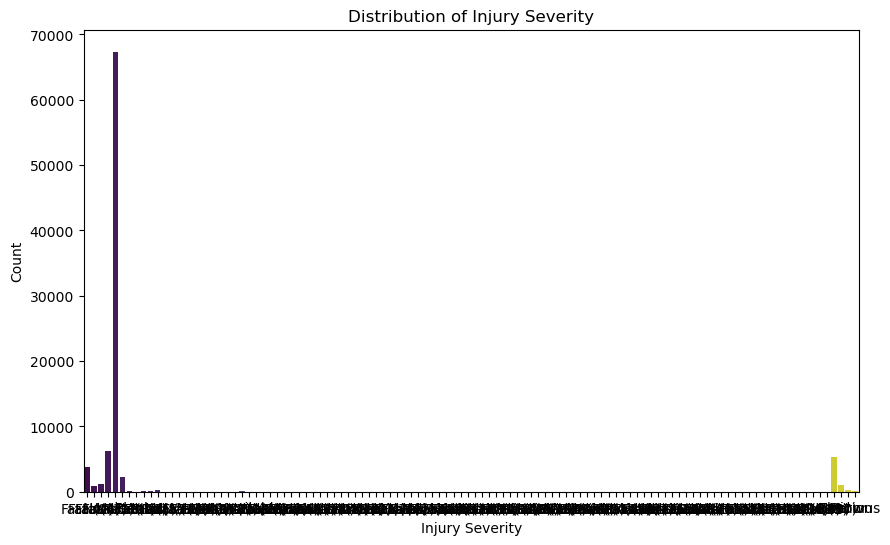

In [ ]:

# Plotting the distribution of Injury Severity
plt.figure(figsize=(10,6))       
sns.countplot(data=df, x='Injury.Severity', palette='viridis')
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.show()


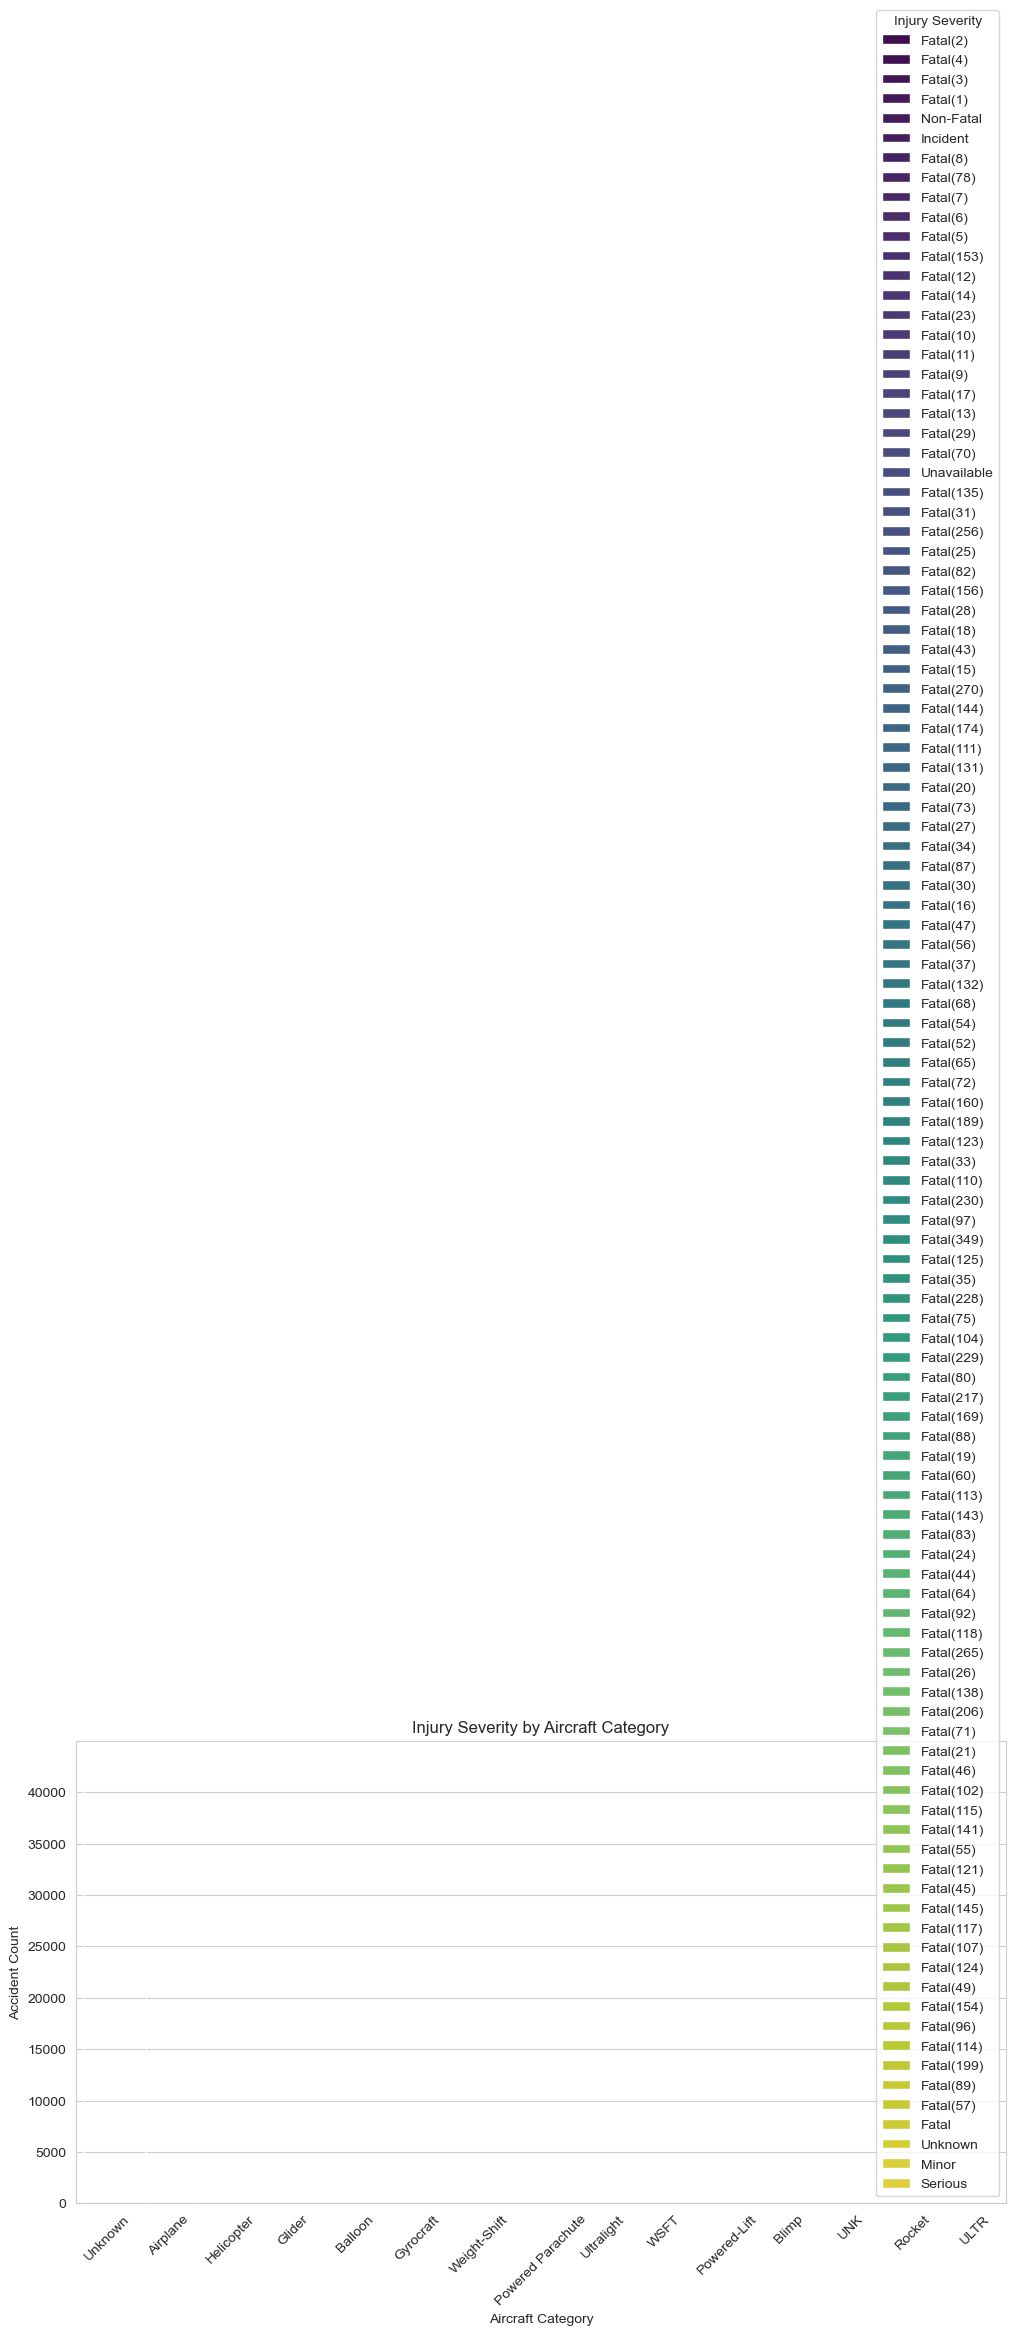

In [117]:
# sorting by total count
order = df['Aircraft.Category'].value_counts().index

plt.figure(figsize=(12,6))
sns.countplot(data=df,  x='Aircraft.Category', hue='Injury.Severity', palette='viridis',order=order)
plt.title('Injury Severity by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')

plt.show()

 Observation:
 The diagram above compares the total number of accidents for each aircraft category.
 The ultralight,gyrocraft and power parachute appear to have the lowest number of injuries.

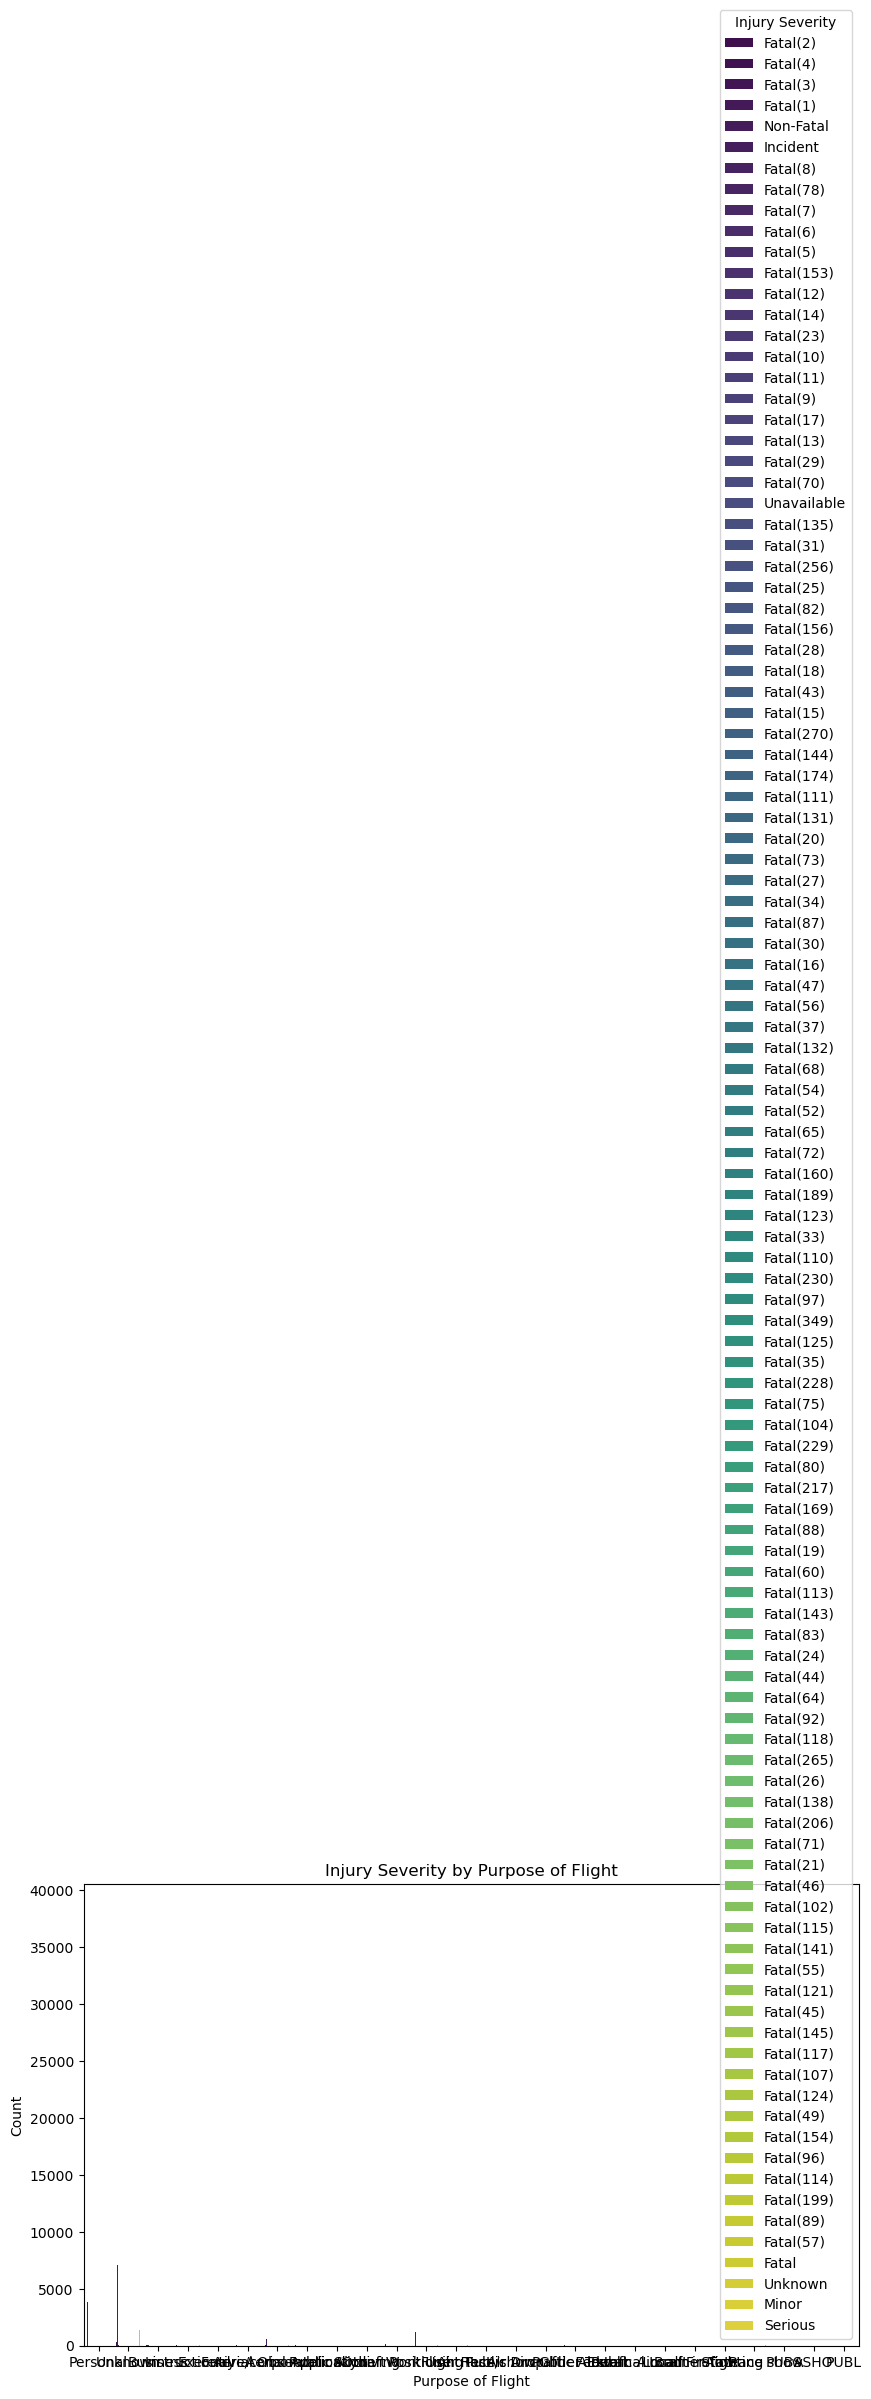

In [100]:
# Plotting injury severity by purpose of flight
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Purpose.of.flight', hue='Injury.Severity', palette='viridis')
plt.title('Injury Severity by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.show()


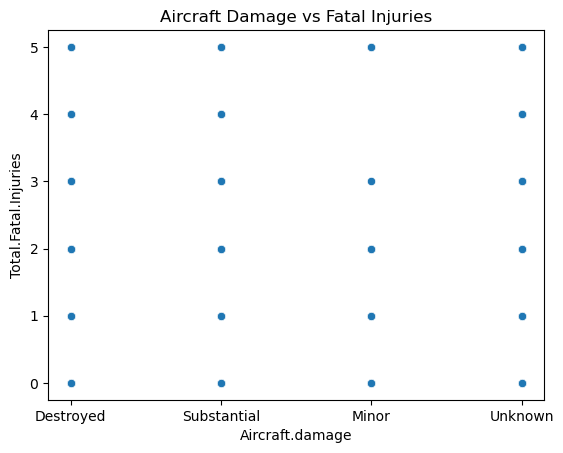

In [88]:
# Scatter plot for Aircraft damage and Total Injuries
sns.scatterplot(data=df, x='Aircraft.damage', y='Total.Fatal.Injuries')
plt.title('Aircraft Damage vs Fatal Injuries')
plt.show()


Observations:
 Positive Correlation: the points generally trend upwards from left to right, suggesting a positive correlation. This implies that as aircraft damage increases, the total number of fatal injuries also tends to increase.

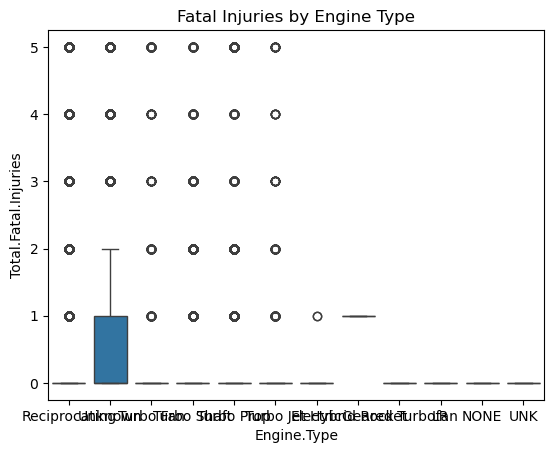

In [ ]:
# Box plot for Engine Type Vs Accident Severity
sns.boxplot(data=df, x='Engine.Type', y='Total.Fatal.Injuries')
plt.title('Fatal Injuries by Engine Type')
plt.show()


Observations:
Accidents involving reciprocating engines tend to have a higher range of fatal injuries, including some with a notable number of fatalities.
Turbo-prop and turbojet engines are generally associated with fewer fatal injuries.
Most other engine types have very few fatal injuries.

C:\Users\Admin\AppData\Local\Temp\ipykernel_37316\2398228804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather.Condition', palette='viridis')


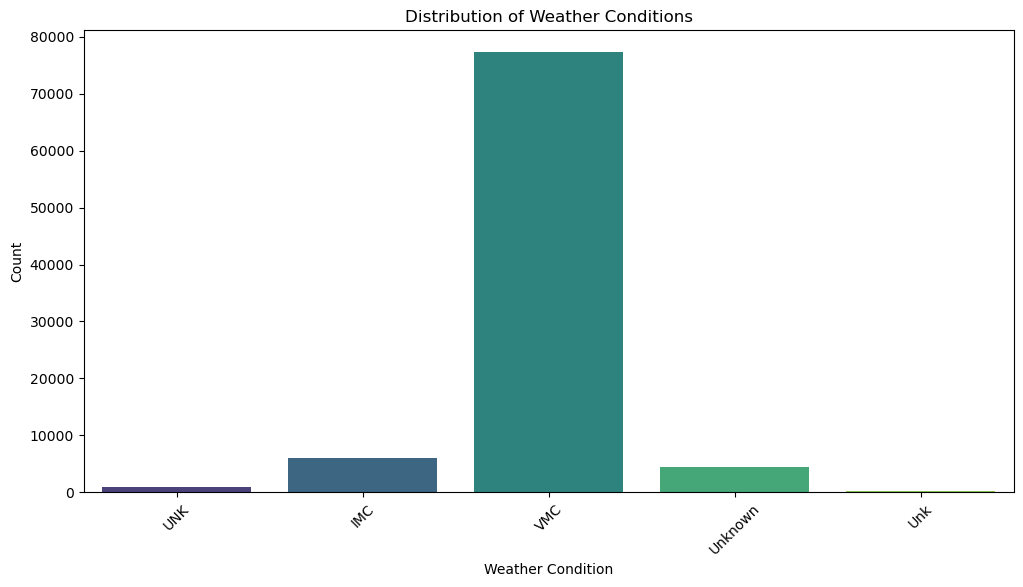

In [101]:
# Plotting the distribution of weather conditions
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Weather.Condition', palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)  # To make labels readable if there are many categories
plt.show()


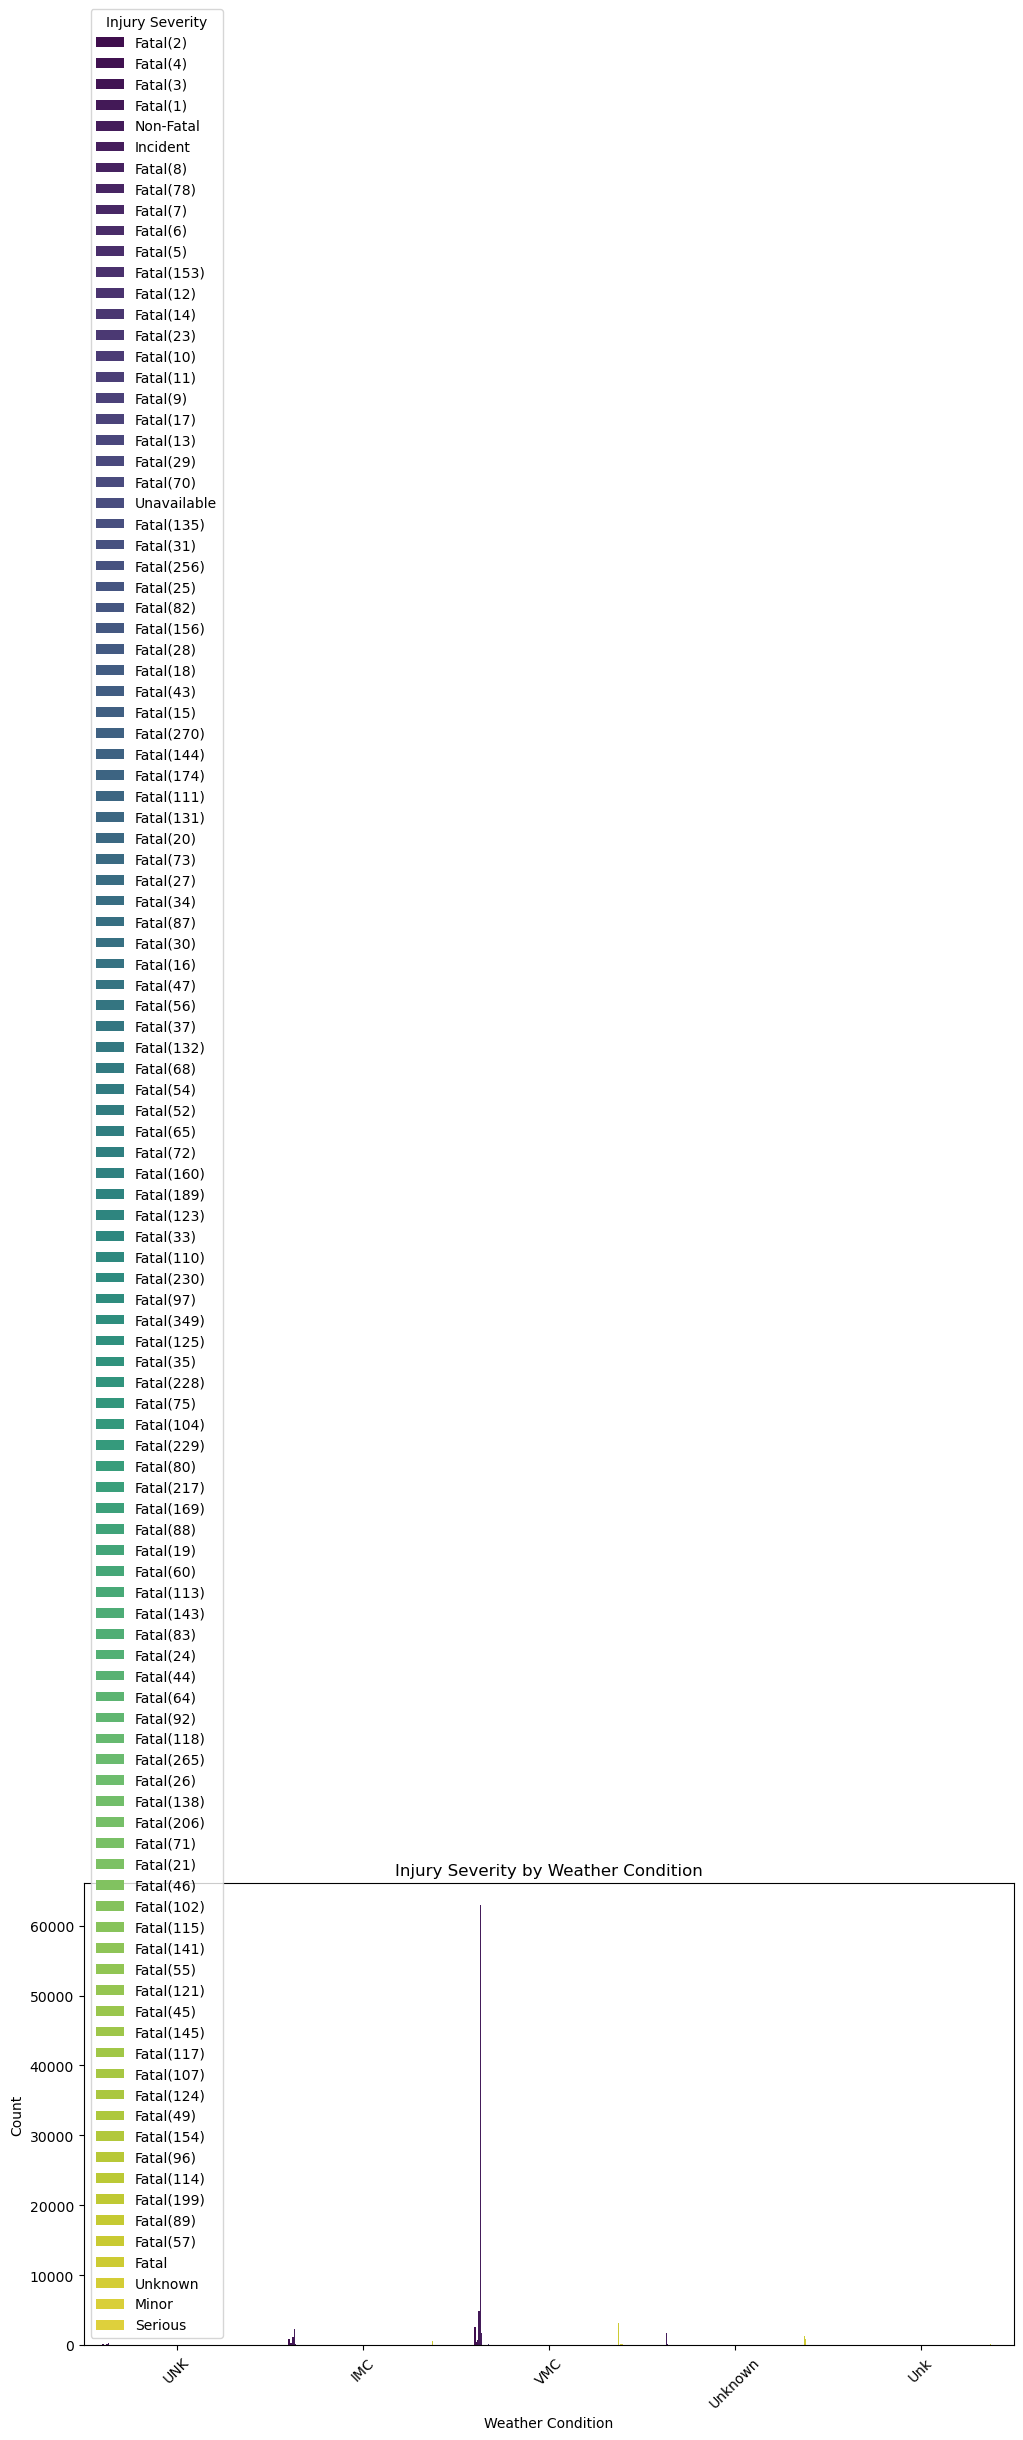

In [102]:
# Plotting injury severity by weather condition
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Weather.Condition', hue='Injury.Severity', palette='viridis')
plt.title('Injury Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_37316\13909685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather.Condition', y='Aircraft.damage', palette='viridis')


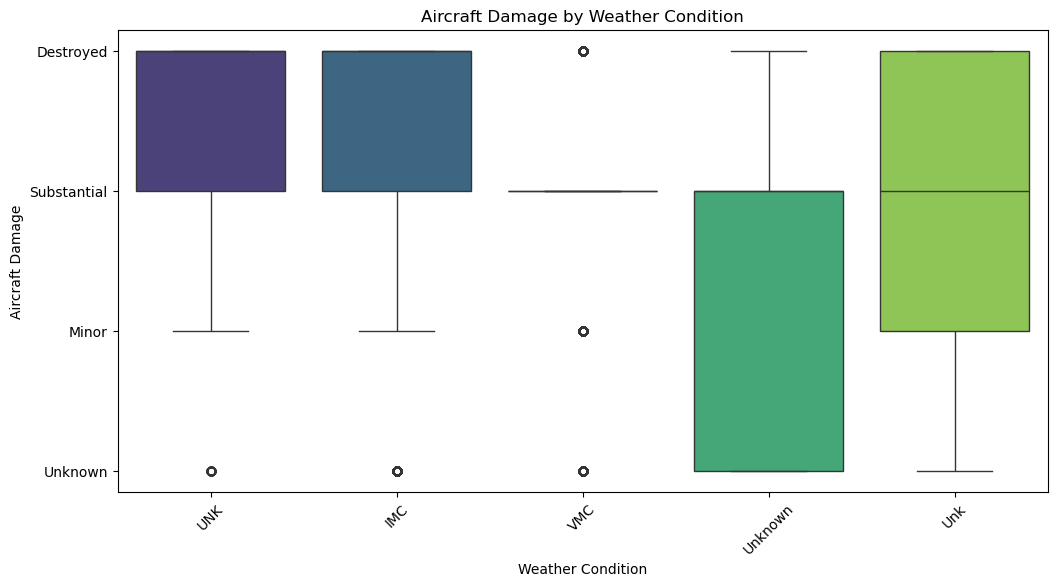

In [103]:
# Plotting aircraft damage by weather condition
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Weather.Condition', y='Aircraft.damage', palette='viridis')
plt.title('Aircraft Damage by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Aircraft Damage')
plt.xticks(rotation=45)
plt.show()


Observations:
UNK weather shows a range of damage, from Unknown to Destroyed. This suggests that when the weather condition is unknown, the resulting damage may vary.
In IMC, the damage ranges from Unknown to Destroyed too.
The plot suggests that aircraft damage can occur across all weather conditions, but the distribution of damage may vary.


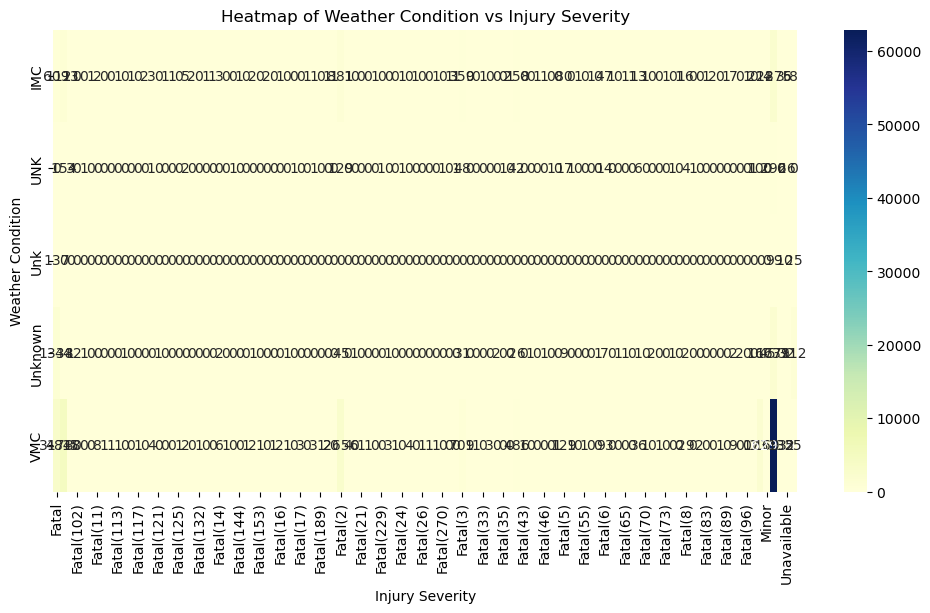

In [104]:
# Create a pivot table for weather condition vs injury severity
weather_injury_pivot = df.groupby(['Weather.Condition', 'Injury.Severity']).size().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(weather_injury_pivot, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Weather Condition vs Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Weather Condition')
plt.show()


Observations:
The weather condition does appear to influence the type of injury severity observed.
While this heatmap shows the relationship between weather condition and injury severity, other factors like aircraft type, accident type, and safety measures also play a role in determining the severity of injuries.

# RECOMMENDATIONS
Based on the heatmap analysis, here are some business recommendations for the company:

Engine Number is Not a Primary Risk Factor: The number of engines is not a primary factor in assessing the risk of an aircraft. The data suggests that the number of engines does not strongly correlate with the severity or number of injuries. Therefore, when selecting aircraft, focus on other factors beyond the number of engines.

Maintenance Schedule: Evaluate the maintenance requirements and history of potential aircraft. Well-maintained aircrafts are generally safer.

 Consider a phased approach to entering the aircraft operation business. Start with lower-risk aircraft and operations, and gradually expand as you gain experience and expertise.